<a href="https://colab.research.google.com/github/SalwaMustafa/DEPI-Tasks/blob/main/Salwa_Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = np.random.randint(1,500,200)
y = 2 * X + 3 + np.random.rand(200)
X = X.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Simple_Linear_Regression = LinearRegression()
Simple_Linear_Regression.fit(x_train, y_train)


y_pred_train = Simple_Linear_Regression.predict(x_train)
y_pred_test = Simple_Linear_Regression.predict(x_test)


print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Test MAE : ", mean_absolute_error(y_test,y_pred_test))

print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Test MSE : ", mean_squared_error(y_test,y_pred_test))

print("Train R2 : ", r2_score(y_train,y_pred_train))
print("Test R2 : ", r2_score(y_test,y_pred_test))

Train MAE :  0.24612902810331824
Test MAE :  0.23127601695040917
Train MSE :  0.0836952847421297
Test MSE :  0.06914196734198629
Train R2 :  0.9999989624066079
Test R2 :  0.9999990911086917


In [2]:
Simple_Linear_Regression.coef_

array([1.99973797])

In [3]:
Simple_Linear_Regression.intercept_

np.float64(3.5908191384673955)

The model achieves very low MAE and MSE, with R² scores close to 1 for both training and testing. The minimal difference between train and test results indicates neither overfitting nor underfitting. This near-perfect performance is due to the data being almost perfectly linear (y = 2X + 3 + small noise).


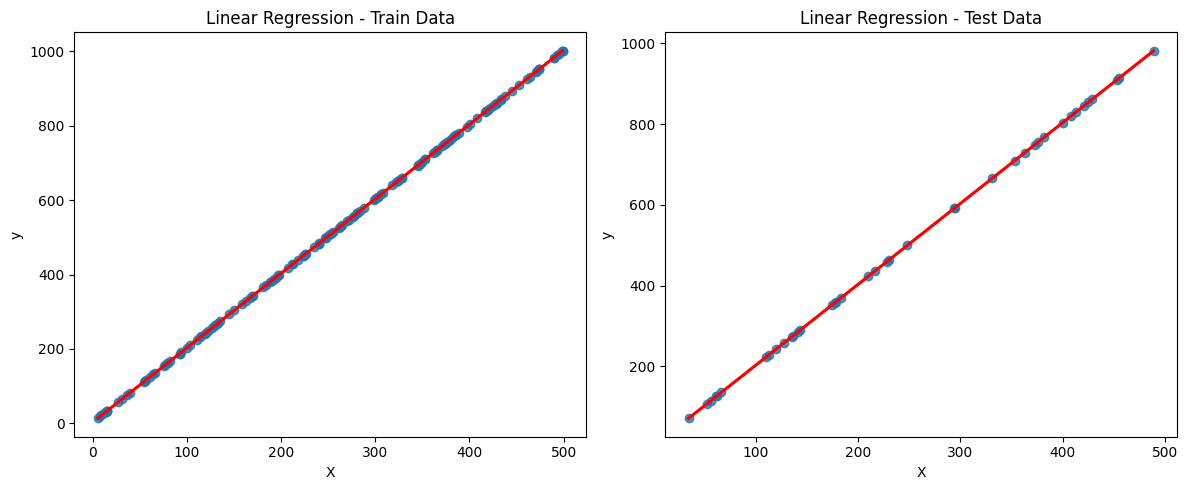

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x=x_train.ravel(), y=y_train, ci=None, line_kws={"color": "red"})
plt.title("Linear Regression - Train Data")
plt.xlabel("X")
plt.ylabel("y")

plt.subplot(1, 2, 2)
sns.regplot(x=x_test.ravel(), y=y_test, ci=None, line_kws={"color": "red"})
plt.title("Linear Regression - Test Data")
plt.xlabel("X")
plt.ylabel("y")

plt.tight_layout()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [5]:
X1 = np.random.randint(1,500,200)
X2 = np.random.randint(1,700,200)

y = 0.5 * X1 + 2.7 * X2 + 3 + np.random.rand(200)
X = np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1)))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Multiple_Linear_Regression = LinearRegression()
Multiple_Linear_Regression.fit(x_train, y_train)


LinearRegression()

In [6]:
Multiple_Linear_Regression.coef_

array([0.50013768, 2.69996936])

In [7]:
Multiple_Linear_Regression.intercept_

np.float64(3.4984825782025837)

The model coefficients are approximately 0.5 for X1 and 2.7 for X2
, which are very close to the true values used to generate the data. The intercept is around 3.49
, also close to the true intercept of 3. This indicates that the model has successfully learned the underlying relationship between the features and the target, with only a small difference due to the random noise added to the data.

In [8]:
y_pred_train = Multiple_Linear_Regression.predict(x_train)
y_pred_test = Multiple_Linear_Regression.predict(x_test)


print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Test MAE : ", mean_absolute_error(y_test,y_pred_test))

print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Test MSE : ", mean_squared_error(y_test,y_pred_test))

print("Train R2 : ", r2_score(y_train,y_pred_train))
print("Test R2 : ", r2_score(y_test,y_pred_test))

Train MAE :  0.2506030295442355
Test MAE :  0.25867434146918244
Train MSE :  0.08288581240841404
Test MSE :  0.0795253528736457
Train R2 :  0.9999997453108735
Test R2 :  0.9999997361420198


The model achieves extremely low MAE and MSE on both the training and testing sets, with R² values essentially equal to 1 for both. The tiny difference between train and test metrics shows that the model generalizes perfectly and does not suffer from overfitting or underfitting. This near-perfect performance is expected because the data was generated using an exact linear relationship with only minimal random noise.

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



Train MAE :  3.9475470251502727
Test MAE :  4.387902250292063
Train MSE :  25.24622610976938
Test MSE :  31.668250983259735
Train R2 :  0.9940317128723171
Test R2 :  0.9880776138841536


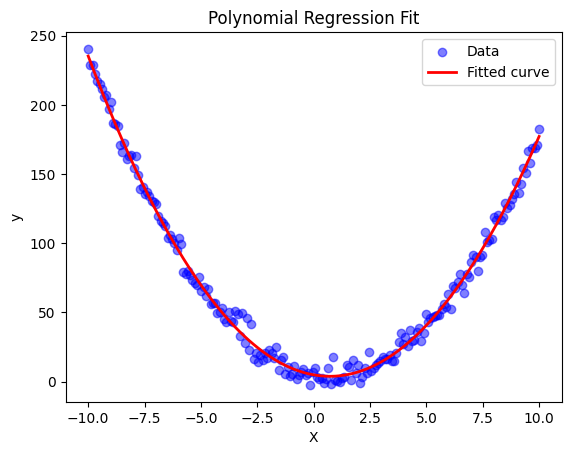

In [9]:
from sklearn.preprocessing import PolynomialFeatures

X = np.linspace(-10, 10, 200).reshape(-1, 1)
y = 2 * X**2 + -3 * X + 5 + np.random.randn(200, 1) * 5

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

Polynomial_Regression = LinearRegression()
Polynomial_Regression.fit(x_train, y_train)

y_pred_train = Polynomial_Regression.predict(x_train)
y_pred_test = Polynomial_Regression.predict(x_test)



print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Test MAE : ", mean_absolute_error(y_test,y_pred_test))

print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Test MSE : ", mean_squared_error(y_test,y_pred_test))

print("Train R2 : ", r2_score(y_train,y_pred_train))
print("Test R2 : ", r2_score(y_test,y_pred_test))



plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.plot(X, Polynomial_Regression.predict(X_poly), color='red', linewidth=2, label='Fitted curve')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()


The model performs very well with low MAE/MSE and high R² (>0.99) for both train and test sets. The close metrics indicate no overfitting or underfitting, as the polynomial degree matches the true data pattern.

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [10]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [11]:
os.listdir(path)

['airlines_flights_data.csv']

In [12]:
full_path = os.path.join(path,os.listdir(path)[0])

In [13]:
import pandas as pd
df = pd.read_csv(full_path)

In [14]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [16]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [17]:
df.drop('index', axis = 1, inplace = True)

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df[df.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [20]:
df.shape

(300153, 11)

In [21]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [22]:
df['flight'].value_counts()

,count
flight,
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
...,...
6E-2914,1
G8-107,1
SG-9974,1


In [23]:
df.drop('flight', axis = 1, inplace = True)

In [24]:
df.duplicated().sum()

np.int64(2213)

In [25]:
df = df.drop_duplicates(keep='first')

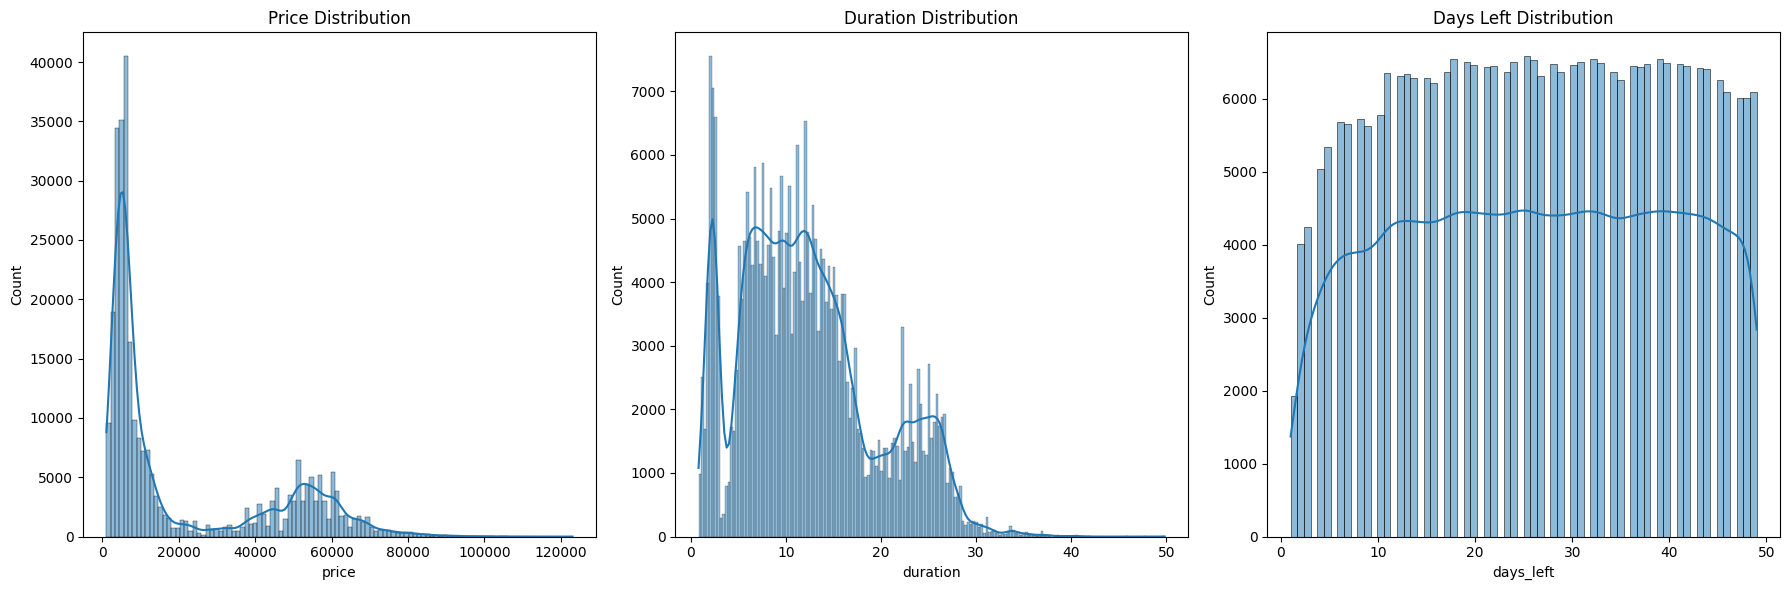

In [26]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['duration'], kde=True)
plt.title('Duration Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['days_left'], kde=True)
plt.title('Days Left Distribution')

plt.tight_layout()
plt.show()


The most people buy tickets priced below 20000




The majority of flights have a duration of less than 10 hours.  


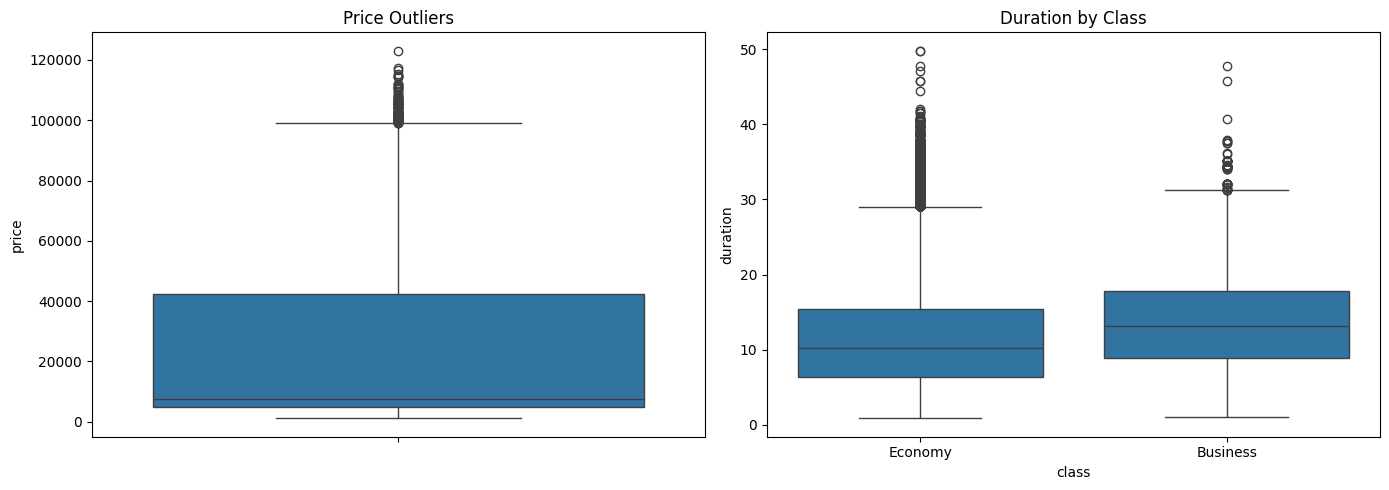

In [27]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Price Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='duration', data=df)
plt.title('Duration by Class')

plt.tight_layout()
plt.show()


The outliers in price by class are expected due to the different tiers of ticket pricing.



We notice in economy the outlier higher because certain flights may have premium services, last-minute bookings and this increase the price.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


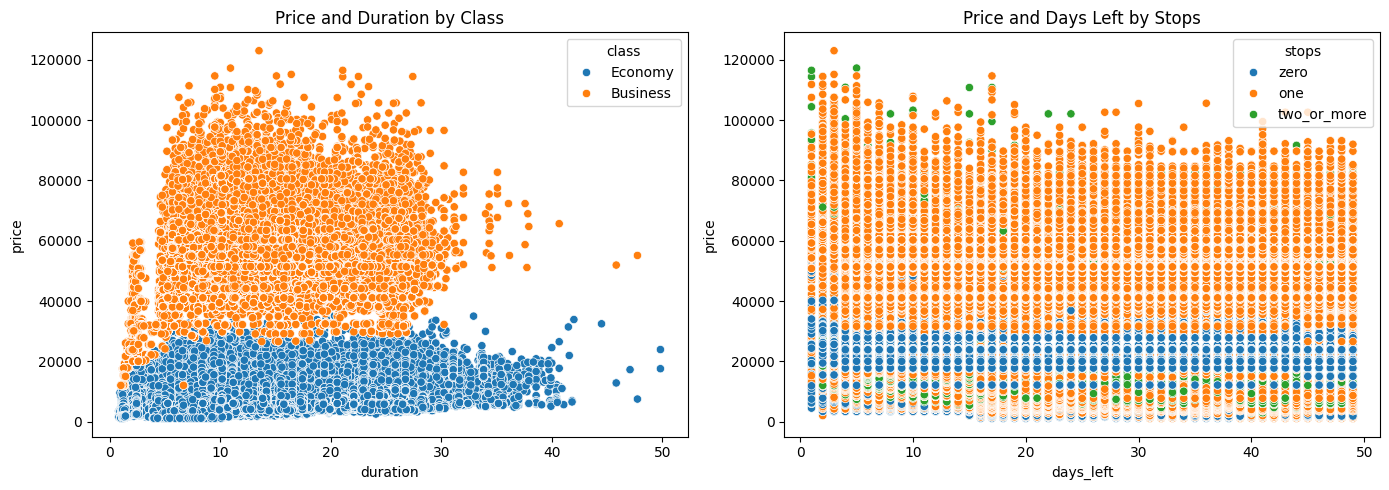

In [28]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='duration', y='price', hue='class', data=df)
plt.title('Price and Duration by Class')

plt.subplot(1, 2, 2)
sns.scatterplot(x='days_left', y='price', hue='stops', data=df)
plt.title('Price and Days Left by Stops')

plt.tight_layout()
plt.show()


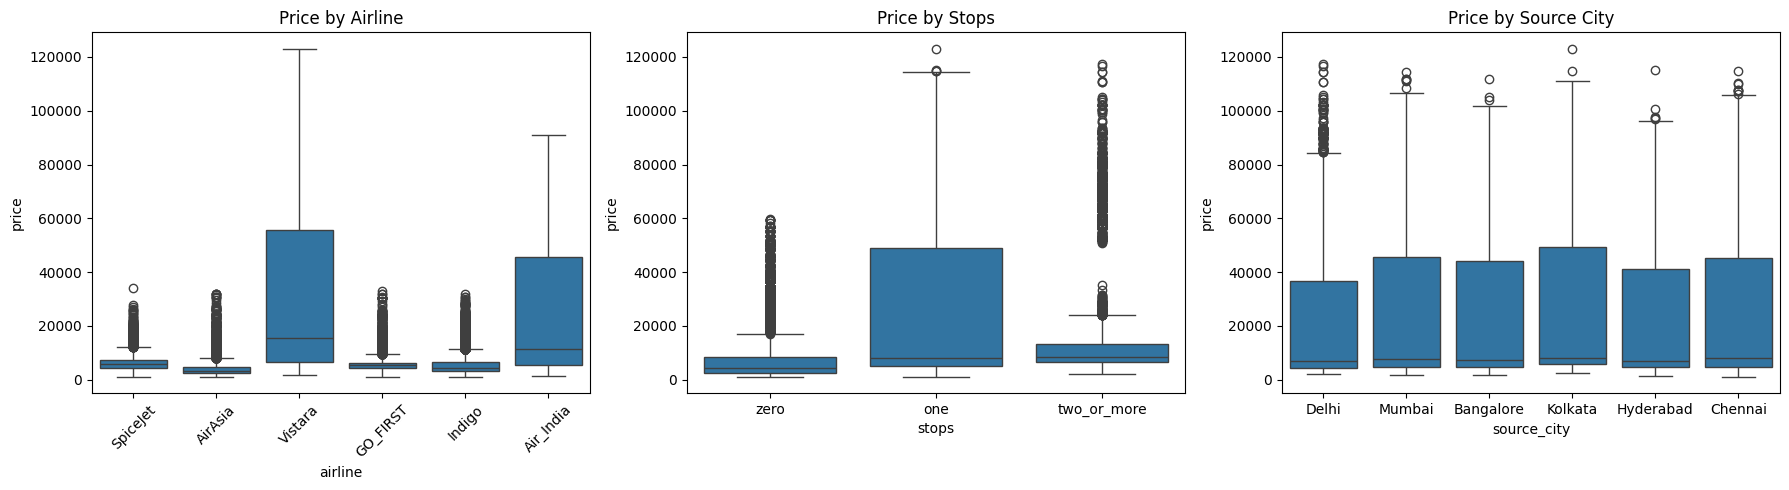

In [29]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='airline', y='price', data=df)
plt.title('Price by Airline')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='stops', y='price', data=df)
plt.title('Price by Stops')

plt.subplot(1, 3, 3)
sns.boxplot(x='source_city', y='price', data=df)
plt.title('Price by Source City')

plt.tight_layout()
plt.show()


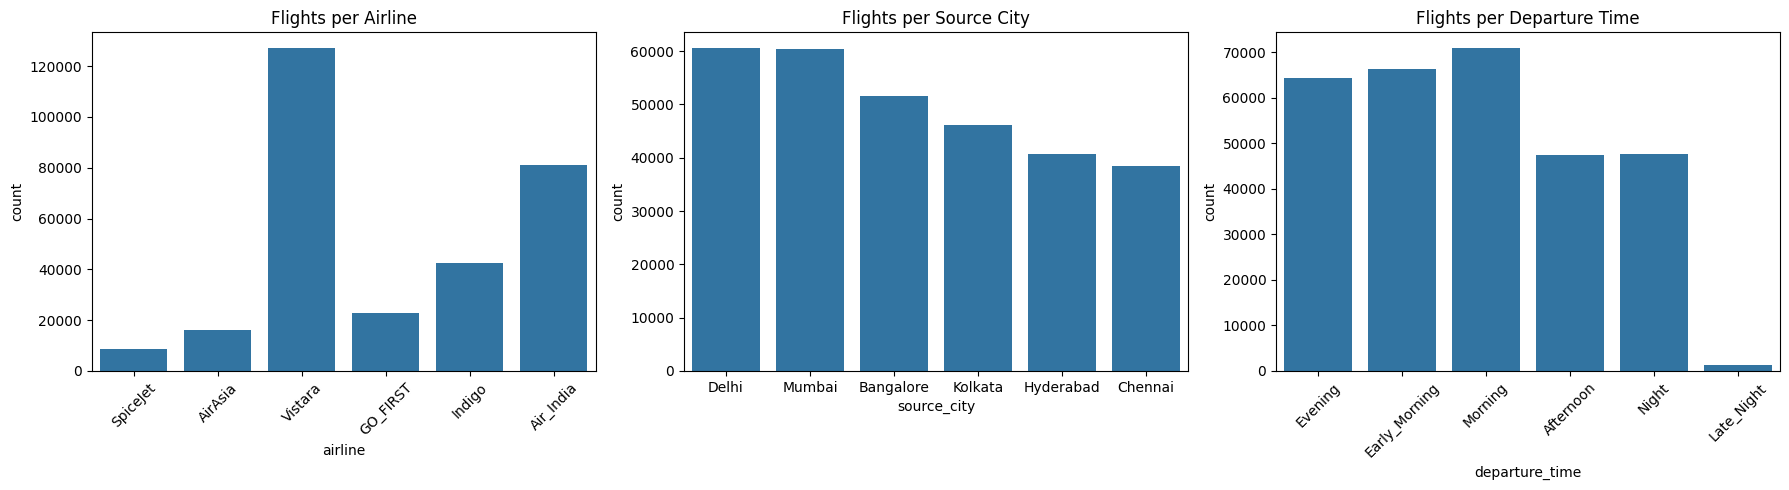

In [30]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='airline', data=df)
plt.title('Flights per Airline')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x='source_city', data=df)
plt.title('Flights per Source City')

plt.subplot(1, 3, 3)
sns.countplot(x='departure_time', data=df)
plt.title('Flights per Departure Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Vistara has the highest average flight prices among all airlines

Delhi has the highest number of flights among all cities

Morning is the most popular departure time for flights

/tmp/ipython-input-3081764557.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='airline', y='price', hue='class', data=df, ci=None)


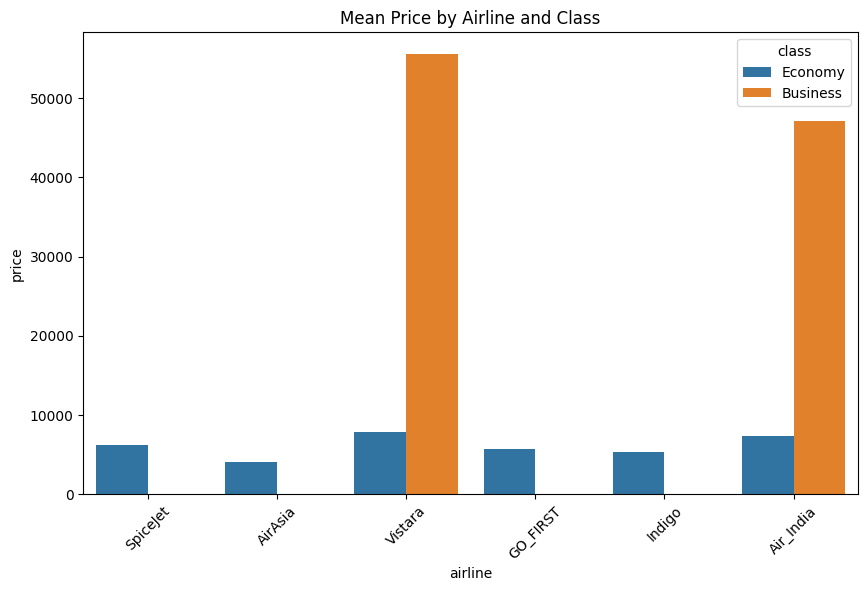

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='price', hue='class', data=df, ci=None)
plt.title('Mean Price by Airline and Class')
plt.xticks(rotation=45)
plt.show()

Just Vistara and Air_India have the Business class

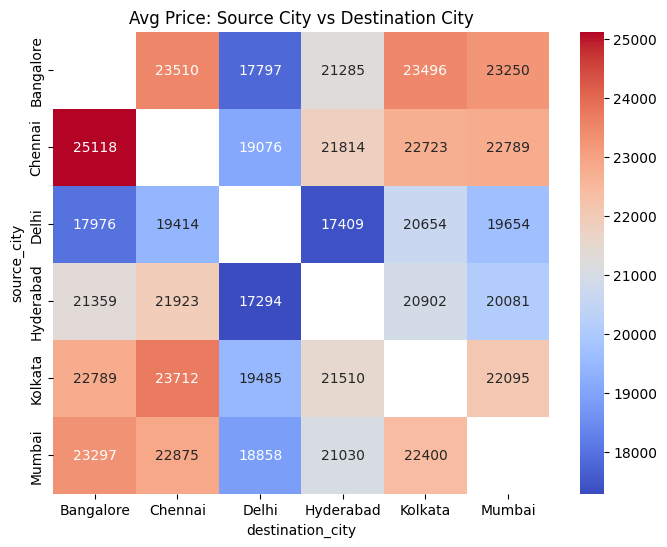

In [32]:
pivot = df.pivot_table(values='price', index='source_city', columns='destination_city', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Avg Price: Source City vs Destination City')
plt.show()

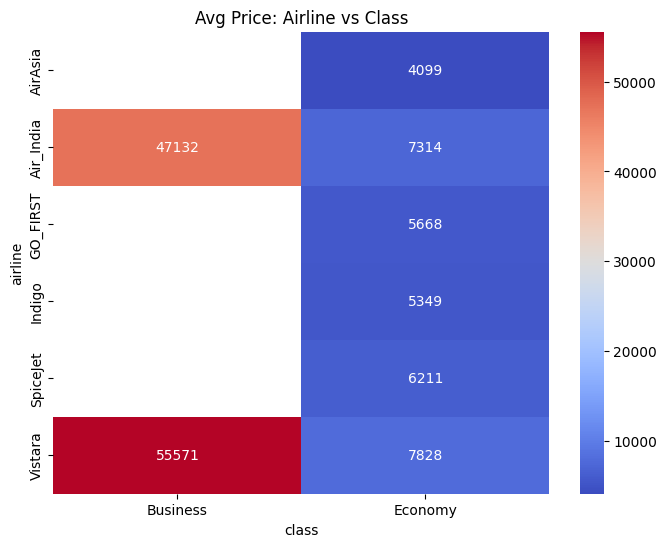

In [33]:
pivot = df.pivot_table(values='price', index='airline', columns='class', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Avg Price: Airline vs Class')
plt.show()

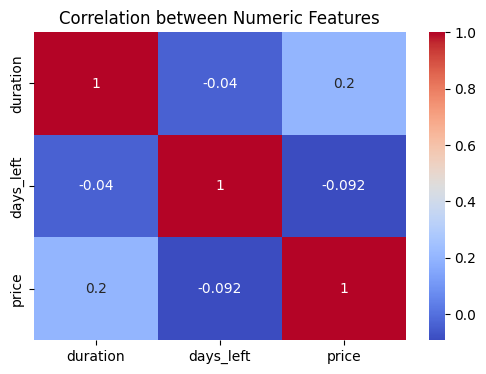

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['duration', 'days_left', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()

In [37]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [44]:
df['airline'].value_counts()

,count
airline,
Vistara,126962
Air_India,80882
Indigo,42470
GO_FIRST,22979
AirAsia,16011
SpiceJet,8636


In [45]:
df['source_city'].value_counts()

,count
source_city,
Delhi,60510
Mumbai,60378
Bangalore,51588
Kolkata,46240
Hyderabad,40704
Chennai,38520


In [46]:
df['departure_time'].value_counts()

,count
departure_time,
Morning,70824
Early_Morning,66250
Evening,64428
Night,47651
Afternoon,47485
Late_Night,1302


In [47]:
df['stops'].value_counts()

,count
stops,
one,250314
zero,34341
two_or_more,13285


In [48]:
df['arrival_time'].value_counts()

,count
arrival_time,
Night,90712
Evening,77960
Morning,62054
Afternoon,38030
Early_Morning,15333
Late_Night,13851


In [49]:
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,58691
Delhi,56749
Bangalore,50634
Kolkata,49202
Hyderabad,42558
Chennai,40106


In [50]:
df['class'].value_counts()

,count
class,
Economy,204767
Business,93173


In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [52]:
df.drop('arrival_time', axis = 1, inplace = True)

/tmp/ipython-input-3729864908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('arrival_time', axis = 1, inplace = True)


Duplicate information due to the flight duration

In [53]:
df['duration'] = np.log1p(df['duration'])
df['price'] = np.log1p(df['price'])

/tmp/ipython-input-1216396385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = np.log1p(df['duration'])
/tmp/ipython-input-1216396385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = np.log1p(df['price'])


In [55]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:

num_features = ['duration', 'days_left']
cat_features = ['airline', 'source_city', 'departure_time', 'stops', 'class']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R2:", r2_score(y_train, y_pred_train))
print("Test R2:", r2_score(y_test, y_pred_test))


Train MSE: 0.1082420254755997
Test MSE: 0.10947444554023983
Train R2: 0.912539437477421
Test R2: 0.9114457054178726
